In [ ]:
import torch
import torchvision
import torchvision.transforms as tfs
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
transform = tfs.Compose([tfs.ToTensor()])

In [ ]:
train_set = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST', train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST', train=False, download=True, transform=transform)


In [ ]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

In [ ]:
torch.set_printoptions(linewidth=120)

In [ ]:
#gives the y's from the training set
print(train_set.train_labels)
#number of images pertaining to each category
print(train_set.train_labels.bincount())

tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [ ]:
batch=next(iter(train_loader))
print(len(batch))
print(type(batch))
imgs,label=batch #instead of img=sample[0] and label=sample[1]

2
<class 'list'>


In [ ]:
print(imgs.shape) #because it's greyscale, to plot the image, you'll need to squeeze it to remove the 1 that says it's a greyscale image
print(label.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10])


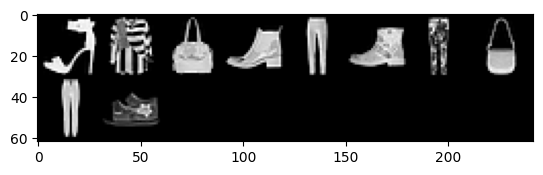

In [ ]:
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0))
plt.show()

In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Output has 10 classes for FashionMNIST

    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 64 * 7 * 7)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for name,para in model.named_parameters():
  print(name,'\t\t', para.shape)
#convolutional layer's tensor has dimensions out_channels,in_channels,kernel_size_side, kernel_size_down
#linear layer's tensor will have dimensions out_features and in_features

conv1.weight 		 torch.Size([32, 1, 3, 3])
conv1.bias 		 torch.Size([32])
conv2.weight 		 torch.Size([64, 32, 3, 3])
conv2.bias 		 torch.Size([64])
fc1.weight 		 torch.Size([128, 3136])
fc1.bias 		 torch.Size([128])
fc2.weight 		 torch.Size([10, 128])
fc2.bias 		 torch.Size([10])


In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.947
[1,  4000] loss: 0.549
[1,  6000] loss: 0.464
[2,  2000] loss: 0.420
[2,  4000] loss: 0.381
[2,  6000] loss: 0.363
[3,  2000] loss: 0.341
[3,  4000] loss: 0.331
[3,  6000] loss: 0.322
[4,  2000] loss: 0.310
[4,  4000] loss: 0.290
[4,  6000] loss: 0.295
[5,  2000] loss: 0.277
[5,  4000] loss: 0.271
[5,  6000] loss: 0.272
Finished Training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f"Accuracy = {(correct/total)*100}")

Accuracy = 89.23
